## 計算台北區域可能發生的最大地震規模

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## 讀取台灣海岸線檔案

In [2]:
margin = np.loadtxt('Taiwanmargin.txt',delimiter = ' ')

In [3]:
print(margin.shape)

(1483, 2)


<Figure size 432x288 with 0 Axes>

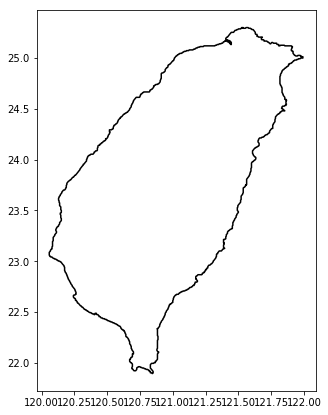

In [4]:
plt.figure()
plt.subplots(figsize=(5,7))
plt.plot(margin[:,1],margin[:,0],'k')

## 讀取1975-2018發生的地震事件

In [5]:
eqs = [] 
alldata = open('data.txt','r')
data = alldata.readlines()
# print(len(data[10000]))
print(data[735386][9:11])
print(data[735386][42:47])

16
14.77


In [6]:
year = []
month = []
day = []
hr = []
minute = []
lat = []
lon = []
dep = []
mag = []
for i in range(len(data)):
    year.append(data[i][1:5])
    month.append(data[i][6:8])
    day.append(data[i][9:11])
    hr.append(data[i][15:17])
    minute.append(data[i][18:23])
    lat.append(data[i][24:31])
    lon.append(data[i][32:40])
    dep.append(data[i][41:47])
    mag.append(data[i][48:52])

In [7]:
year = np.array(year[:])
month = np.array(month[:])
day = np.array(day[:])
hr = np.array(hr[:])
minute = np.array(minute[:])
lat = np.array(lat[:])
lon = np.array(lon[:])
dep = np.array(dep[:])
mag = np.array(mag[:])

In [8]:
print(year[0:10])
print(month[0:10])
print(day[0:10])
print(hr[0:10])
print(minute[0:10])
print(lat[0:10])
print(lon[0:10])
print(dep[0:10])
print(mag[0:10])

['1975' '1975' '1975' '1975' '1975' '1975' '1975' '1975' '1975' '1975']
[' 1' ' 1' ' 1' ' 1' ' 1' ' 1' ' 1' ' 1' ' 1' ' 1']
[' 1' ' 1' ' 1' ' 1' ' 1' ' 1' ' 2' ' 2' ' 2' ' 2']
[' 0' ' 1' ' 3' ' 4' '11' '17' ' 3' ' 4' ' 4' ' 7']
['14.00' '49.00' '47.00' '24.00' ' 1.00' '55.00' '28.00' '16.00' '23.00'
 '28.00']
['24.6940' '24.1600' '24.0380' '22.9540' '23.5280' '24.7450' '24.8840'
 '24.3170' '24.0590' '24.5370']
['121.6980' '121.4900' '121.6220' '121.0250' '121.0470' '122.9280'
 '121.6940' '121.6840' '121.6730' '121.5710']
[' 70.00' '  2.14' ' 32.77' '   .25' '  5.00' '102.44' ' 88.06' '  9.27'
 ' 54.31' '  5.00']
['1.84' '2.40' '2.70' '2.99' '2.34' '3.69' '2.14' '2.09' '2.90' '1.70']


In [9]:
year = list(map(float,year))
month = list(map(float,month))
day = list(map(float,day))
hr = list(map(float,hr))
minute = list(map(float,minute))
lat = list(map(float,lat))
lon = list(map(float,lon))
dep = list(map(float,dep))
mag = list(map(float,mag))
# year = list(map(float, year))

<Figure size 432x288 with 0 Axes>

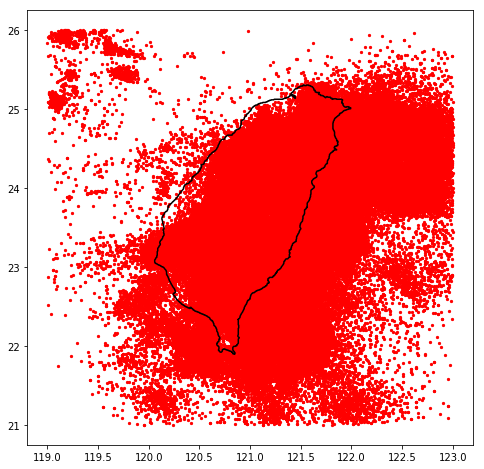

In [10]:
plt.figure()
plt.subplots(figsize=(8,8))
plt.scatter(lon[:],lat[:],s=5,c='r')
plt.plot(margin[:,1],margin[:,0],'k')

## 計算距離,並設定中心為我家

In [11]:
myhomelat = 25.032116
myhomelon = 121.538087
dx = 0.
dy = 0.
delta = 0.

In [12]:
def delaz(elat,elon,slat,slon,dx,dy,delta):
    avlat=0.5*(elat+slat)
    a=1.840708+avlat*(.0015269+avlat*(-.00034+avlat*(1.02337e-6)))
    b=1.843404+avlat*(-6.93799e-5+avlat*(8.79993e-6+avlat*(-6.47527e-8)))
    dlat=slat-elat
    dlon=slon-elon
    dx=a*dlon*60.
    dy=b*dlat*60.
    delta=math.sqrt(dx*dx+dy*dy)
    return delta

In [70]:
Taipei_lon = []
Taipei_lat = []
Taipei_mag = []
Taipei_dep = []
Taipei = open('Taipei.txt','w+')
for i in range(len(data)):
    dis = delaz(float(lat[i]),float(lon[i]),myhomelat,myhomelon,dx,dy,delta)
    if dis <= 30.0:
        correct = [str(lat[i])+'\t'+str(lon[i])+'\t'+str(dep[i])+'\t'+str(mag[i])+'\n']
        Taipei.writelines(correct)
        Taipei_lon.append(lon[i])
        Taipei_lat.append(lat[i])
        Taipei_mag.append(mag[i])
        Taipei_dep.append(dep[i])

In [71]:
print(len(Taipei_mag))

6923


<Figure size 432x288 with 0 Axes>

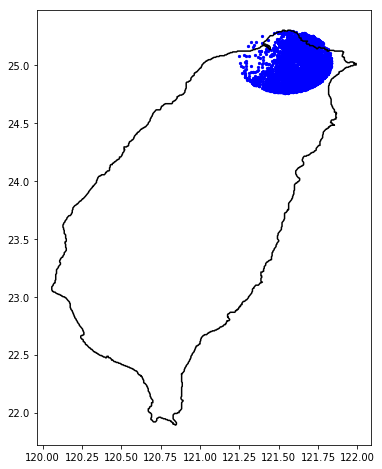

In [72]:
plt.figure()
plt.subplots(figsize=(6,8))
plt.plot(margin[:,1],margin[:,0],'k')
plt.scatter(Taipei_lon[:],Taipei_lat[:],c = 'b',s = 5)

## 開始計算累積規模

In [93]:
total = 0
cumulate = np.zeros(75)
for x in range(0,75):
    magnitude = round(7.5-x*0.1,2)
#     print(magnitude)
    for i in range(len(Taipei_mag)):
        if round(magnitude+0.1,2) > round(Taipei_mag[i],3) >= round(magnitude,2):
            total+=1
            print(magnitude,total)
        cumulate[74-x] = total

5.3 1
5.2 2
5.1 3
4.9 4
4.9 5
4.8 6
4.8 7
4.6 8
4.5 9
4.5 10
4.4 11
4.3 12
4.3 13
4.3 14
4.3 15
4.2 16
4.2 17
4.2 18
4.2 19
4.2 20
4.2 21
4.2 22
4.2 23
4.1 24
4.1 25
4.1 26
4.1 27
4.1 28
4.1 29
4.0 30
4.0 31
4.0 32
4.0 33
4.0 34
4.0 35
4.0 36
3.9 37
3.9 38
3.9 39
3.9 40
3.9 41
3.9 42
3.9 43
3.9 44
3.9 45
3.9 46
3.9 47
3.9 48
3.8 49
3.8 50
3.8 51
3.8 52
3.8 53
3.8 54
3.8 55
3.8 56
3.8 57
3.8 58
3.7 59
3.7 60
3.7 61
3.7 62
3.7 63
3.7 64
3.7 65
3.7 66
3.7 67
3.7 68
3.7 69
3.7 70
3.7 71
3.7 72
3.7 73
3.6 74
3.6 75
3.6 76
3.6 77
3.6 78
3.6 79
3.6 80
3.6 81
3.6 82
3.6 83
3.6 84
3.6 85
3.6 86
3.6 87
3.6 88
3.6 89
3.6 90
3.6 91
3.6 92
3.6 93
3.6 94
3.6 95
3.6 96
3.6 97
3.6 98
3.6 99
3.6 100
3.5 101
3.5 102
3.5 103
3.5 104
3.5 105
3.5 106
3.5 107
3.5 108
3.5 109
3.5 110
3.5 111
3.5 112
3.5 113
3.5 114
3.5 115
3.5 116
3.5 117
3.5 118
3.5 119
3.5 120
3.5 121
3.5 122
3.5 123
3.5 124
3.5 125
3.5 126
3.5 127
3.5 128
3.5 129
3.5 130
3.5 131
3.5 132
3.5 133
3.5 134
3.4 135
3.4 136
3.4 137
3.4 138
3.4 

2.5 2003
2.5 2004
2.5 2005
2.5 2006
2.5 2007
2.5 2008
2.5 2009
2.5 2010
2.5 2011
2.5 2012
2.5 2013
2.5 2014
2.5 2015
2.5 2016
2.5 2017
2.5 2018
2.5 2019
2.5 2020
2.5 2021
2.5 2022
2.5 2023
2.5 2024
2.5 2025
2.5 2026
2.5 2027
2.5 2028
2.5 2029
2.5 2030
2.5 2031
2.5 2032
2.5 2033
2.5 2034
2.5 2035
2.5 2036
2.5 2037
2.5 2038
2.4 2039
2.4 2040
2.4 2041
2.4 2042
2.4 2043
2.4 2044
2.4 2045
2.4 2046
2.4 2047
2.4 2048
2.4 2049
2.4 2050
2.4 2051
2.4 2052
2.4 2053
2.4 2054
2.4 2055
2.4 2056
2.4 2057
2.4 2058
2.4 2059
2.4 2060
2.4 2061
2.4 2062
2.4 2063
2.4 2064
2.4 2065
2.4 2066
2.4 2067
2.4 2068
2.4 2069
2.4 2070
2.4 2071
2.4 2072
2.4 2073
2.4 2074
2.4 2075
2.4 2076
2.4 2077
2.4 2078
2.4 2079
2.4 2080
2.4 2081
2.4 2082
2.4 2083
2.4 2084
2.4 2085
2.4 2086
2.4 2087
2.4 2088
2.4 2089
2.4 2090
2.4 2091
2.4 2092
2.4 2093
2.4 2094
2.4 2095
2.4 2096
2.4 2097
2.4 2098
2.4 2099
2.4 2100
2.4 2101
2.4 2102
2.4 2103
2.4 2104
2.4 2105
2.4 2106
2.4 2107
2.4 2108
2.4 2109
2.4 2110
2.4 2111
2.4 2112
2.4 2113
2

2.0 3753
2.0 3754
2.0 3755
2.0 3756
2.0 3757
2.0 3758
2.0 3759
2.0 3760
2.0 3761
2.0 3762
2.0 3763
2.0 3764
2.0 3765
2.0 3766
2.0 3767
2.0 3768
2.0 3769
2.0 3770
2.0 3771
2.0 3772
2.0 3773
2.0 3774
2.0 3775
2.0 3776
2.0 3777
2.0 3778
2.0 3779
2.0 3780
2.0 3781
2.0 3782
2.0 3783
2.0 3784
2.0 3785
2.0 3786
2.0 3787
2.0 3788
2.0 3789
2.0 3790
2.0 3791
2.0 3792
2.0 3793
2.0 3794
2.0 3795
2.0 3796
2.0 3797
2.0 3798
2.0 3799
2.0 3800
2.0 3801
2.0 3802
2.0 3803
2.0 3804
2.0 3805
2.0 3806
2.0 3807
2.0 3808
2.0 3809
2.0 3810
2.0 3811
2.0 3812
2.0 3813
2.0 3814
2.0 3815
2.0 3816
2.0 3817
2.0 3818
2.0 3819
2.0 3820
2.0 3821
2.0 3822
2.0 3823
2.0 3824
2.0 3825
2.0 3826
2.0 3827
2.0 3828
2.0 3829
2.0 3830
2.0 3831
2.0 3832
2.0 3833
2.0 3834
2.0 3835
2.0 3836
2.0 3837
2.0 3838
2.0 3839
2.0 3840
2.0 3841
2.0 3842
2.0 3843
2.0 3844
2.0 3845
2.0 3846
2.0 3847
2.0 3848
2.0 3849
2.0 3850
2.0 3851
2.0 3852
2.0 3853
2.0 3854
2.0 3855
2.0 3856
2.0 3857
2.0 3858
2.0 3859
2.0 3860
2.0 3861
2.0 3862
2.0 3863
2

1.5 5489
1.5 5490
1.5 5491
1.5 5492
1.5 5493
1.5 5494
1.5 5495
1.5 5496
1.5 5497
1.5 5498
1.5 5499
1.5 5500
1.5 5501
1.5 5502
1.5 5503
1.5 5504
1.5 5505
1.5 5506
1.5 5507
1.5 5508
1.5 5509
1.5 5510
1.5 5511
1.5 5512
1.5 5513
1.5 5514
1.5 5515
1.5 5516
1.5 5517
1.5 5518
1.5 5519
1.5 5520
1.5 5521
1.5 5522
1.5 5523
1.5 5524
1.5 5525
1.5 5526
1.5 5527
1.5 5528
1.5 5529
1.5 5530
1.5 5531
1.5 5532
1.5 5533
1.5 5534
1.5 5535
1.5 5536
1.5 5537
1.5 5538
1.5 5539
1.5 5540
1.5 5541
1.5 5542
1.5 5543
1.5 5544
1.5 5545
1.5 5546
1.5 5547
1.5 5548
1.5 5549
1.5 5550
1.5 5551
1.5 5552
1.5 5553
1.5 5554
1.5 5555
1.5 5556
1.5 5557
1.5 5558
1.5 5559
1.5 5560
1.5 5561
1.5 5562
1.5 5563
1.5 5564
1.5 5565
1.5 5566
1.5 5567
1.5 5568
1.5 5569
1.5 5570
1.5 5571
1.5 5572
1.5 5573
1.5 5574
1.5 5575
1.5 5576
1.5 5577
1.5 5578
1.5 5579
1.5 5580
1.5 5581
1.5 5582
1.5 5583
1.5 5584
1.5 5585
1.5 5586
1.5 5587
1.5 5588
1.5 5589
1.5 5590
1.5 5591
1.5 5592
1.5 5593
1.5 5594
1.5 5595
1.5 5596
1.5 5597
1.5 5598
1.5 5599
1

0.8 6740
0.8 6741
0.8 6742
0.8 6743
0.8 6744
0.8 6745
0.8 6746
0.8 6747
0.8 6748
0.8 6749
0.8 6750
0.8 6751
0.8 6752
0.8 6753
0.8 6754
0.8 6755
0.8 6756
0.8 6757
0.8 6758
0.8 6759
0.8 6760
0.8 6761
0.8 6762
0.8 6763
0.8 6764
0.8 6765
0.8 6766
0.8 6767
0.8 6768
0.8 6769
0.8 6770
0.8 6771
0.8 6772
0.8 6773
0.8 6774
0.8 6775
0.8 6776
0.8 6777
0.8 6778
0.8 6779
0.8 6780
0.8 6781
0.8 6782
0.8 6783
0.8 6784
0.8 6785
0.8 6786
0.8 6787
0.8 6788
0.8 6789
0.8 6790
0.8 6791
0.8 6792
0.8 6793
0.8 6794
0.8 6795
0.8 6796
0.8 6797
0.8 6798
0.8 6799
0.7 6800
0.7 6801
0.7 6802
0.7 6803
0.7 6804
0.7 6805
0.7 6806
0.7 6807
0.7 6808
0.7 6809
0.7 6810
0.7 6811
0.7 6812
0.7 6813
0.7 6814
0.7 6815
0.7 6816
0.7 6817
0.7 6818
0.7 6819
0.7 6820
0.7 6821
0.7 6822
0.7 6823
0.7 6824
0.7 6825
0.7 6826
0.7 6827
0.7 6828
0.7 6829
0.7 6830
0.7 6831
0.7 6832
0.7 6833
0.7 6834
0.7 6835
0.7 6836
0.7 6837
0.7 6838
0.7 6839
0.7 6840
0.7 6841
0.7 6842
0.7 6843
0.7 6844
0.7 6845
0.7 6846
0.7 6847
0.7 6848
0.7 6849
0.7 6850
0

In [94]:
print(cumulate[:])

[6.923e+03 6.922e+03 6.922e+03 6.919e+03 6.911e+03 6.894e+03 6.864e+03
 6.799e+03 6.713e+03 6.598e+03 6.470e+03 6.307e+03 6.135e+03 5.936e+03
 5.694e+03 5.459e+03 5.151e+03 4.783e+03 4.425e+03 4.020e+03 3.595e+03
 3.215e+03 2.822e+03 2.418e+03 2.038e+03 1.687e+03 1.360e+03 1.065e+03
 7.930e+02 5.990e+02 4.540e+02 3.350e+02 2.470e+02 1.840e+02 1.340e+02
 1.000e+02 7.300e+01 5.800e+01 4.800e+01 3.600e+01 2.900e+01 2.300e+01
 1.500e+01 1.100e+01 1.000e+01 8.000e+00 7.000e+00 7.000e+00 5.000e+00
 3.000e+00 3.000e+00 2.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


## 計算可能最大規模 By Richter : LogN = a-b*M a,b為常數

In [95]:
y = [mag01,mag02,mag03,mag04,mag05,mag06,mag07,mag08,mag09,
    mag11,mag12,mag13,mag14,mag15,mag16,mag17,mag18,mag19,mag20
    ,mag21,mag22,mag23,mag24,mag25,mag26,mag27,mag28,mag29,mag30
    ,mag31,mag32,mag33,mag34,mag35,mag36,mag37,mag38,mag39,mag40
    ,mag41,mag42,mag43,mag44,mag45,mag46,mag47,mag48,mag49,mag50
    ,mag51,mag52,mag53,mag54,mag55,mag56,mag57,mag58,mag59,mag60
    ,mag61,mag62,mag63,mag64,mag65,mag66,mag67,mag68,mag69]

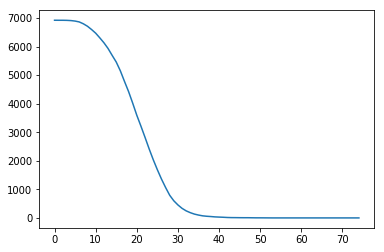

In [104]:
plt.figure()
# plt.subplots(figsize = (20,15))
plt.plot(cumulate[:])
# plt.xlim(5,30)
# plt.ylim(0,7000)

In [107]:
available = cumulate[13:28]

## 紅色區間為開始符合回歸線的位置

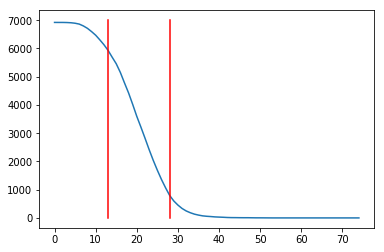

In [106]:
plt.figure()
# plt.subplots(figsize = (20,15))
plt.plot(cumulate)
plt.plot((13,13),(0,7000),'r')
plt.plot((28,28),(0,7000),'r')

## 開始做直線回歸

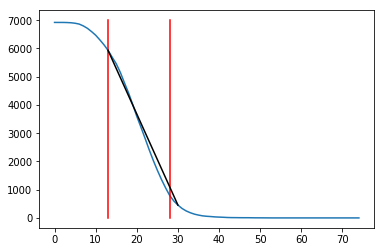

In [127]:
plt.figure()
# plt.subplots(figsize = (20,15))
plt.plot(cumulate)
plt.plot((13,13),(0,7000),'r')
plt.plot((28,28),(0,7000),'r')
plt.plot((p1_x,p2_x),(p1_y,p2_y),'k')

## 帶入公式

In [130]:
y_13 = math.log10(cumulate[13])
y_28 = math.log10(cumulate[28])
b = (y_28-y_13)/1.5
a = b*1.3+y_13

In [131]:
print(a,b)

3.0158359479780525 -0.5828138033022446


## 所以得到台北的平均地震規模為3.0左右